# 1. Regression (การถดถอย)

วิธีการทางสถิติที่ใช้ในการหาความสัมพันธ์ระหว่างตัวแปรต้น (Independent variable) และตัวแปรตาม (Dependent variable) เพื่อทำนายค่าของตัวแปรตามจากตัวแปรต้นที่รู้ค่ามาก่อน
โดยจะใช้ X, y เป็นส่วนใหญ่ 

ประเภทของ Regression ที่นิยมใช้
1. Linear Regression (การถดถอยเชิงเส้น) : ค้นหาความสัมพันธ์แบบเส้นตรงระหว่างตัวแปร
   
2. Multiple Regression (การถดถอยเชิงพหุ) : ใช้ตัวแปรต้นหลายตัวในการทำนายตัวแปรตาม

### Dataset Setting

In [1]:
import pandas as pd
url = url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
data = pd.read_fwf(url)

columns = ['symbol', 'norm-loss', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body_style', 'drive-wheels', 'engine-location', 'wheel-base',\
           'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', \
           'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

df = pd.read_csv(url,sep=',', header = None, names=columns)

d = {'?':0, 'four':4, 'two':2}
df['num-of-doors'] = df['num-of-doors'].map(d)

# Query Nan values
df[df.isnull().
   any(axis=1)]

# drop np
df = df.dropna()

# Focus on horsepower, peak-rpm, city-mpg, highway-mpg, price
auto = df[['horsepower','peak-rpm','city-mpg','highway-mpg','price']] # view of dataframe

auto = auto.drop(auto[auto.horsepower == '?'].index)
auto = auto.drop(auto[auto['peak-rpm'] == '?'].index)
auto = auto.drop(auto[auto['city-mpg'] == '?'].index)
auto = auto.drop(auto[auto['highway-mpg'] == '?'].index)
auto = auto.drop(auto[auto['price']== '?'].index)

# convert data type

for col in auto.columns:
    auto[col] = pd.to_numeric(auto[col])

auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 204
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   horsepower   199 non-null    int64
 1   peak-rpm     199 non-null    int64
 2   city-mpg     199 non-null    int64
 3   highway-mpg  199 non-null    int64
 4   price        199 non-null    int64
dtypes: int64(5)
memory usage: 9.3 KB


## 1.1 Linear Regression (Simple Linear Regression)
การศึกษาความสัมพันธ์ระหว่าง 2 ตัวแปร โดยใช้ Linear Model

 $
    y = mx + b
    $

>y = คือค่าที่ต้องการทำนาย

>x = คือค่าตัวแปรต้น

>m = คือความชันของเส้นตรง
 
>b = คือจุดตัดแกน y

Linear models เป็นชุดของวิธีการที่ใช้ในการพยากรณ์ (regression) โดยค่าที่คาดการณ์จะเป็นการผสมเชิงเส้นของตัวแปรต่างๆ (features) เช่น
$$
\hat{y} (w,x) = w_0 + w_1(x_1) + ... + w_p(x_p)
$$

โดยโมเดลกำหนดคำสั่งดังนี้
```coef_``` 
= slope (m)
และ ```intercept_```
= b

**LinearRegression** ปรับค่าของโมเดลเชิงเส้นโดยใช้ค่าสัมประสิทธิ์ $ w = (w_1,..., w_p) $ เพื่อลดผลรวมของความคลาดเคลื่อนระหว่างค่าที่สังเกตได้ในชุดข้อมูลกับค่าที่โมเดลพยากรณ์. Mathematically it solves a problem of the form:
$$
min_w {||X_w - y||}{^{2}}
$$

**LinearRegression** จะใช้คำสั่ง
```fit``` 
โดยใช้ข้อมูล X, y และคำนวณหาค่าสัมประสิทธิ์ $ w $ ซึ่งถูกเก็บไว้ในคำสั่ง
``` coef_``` 

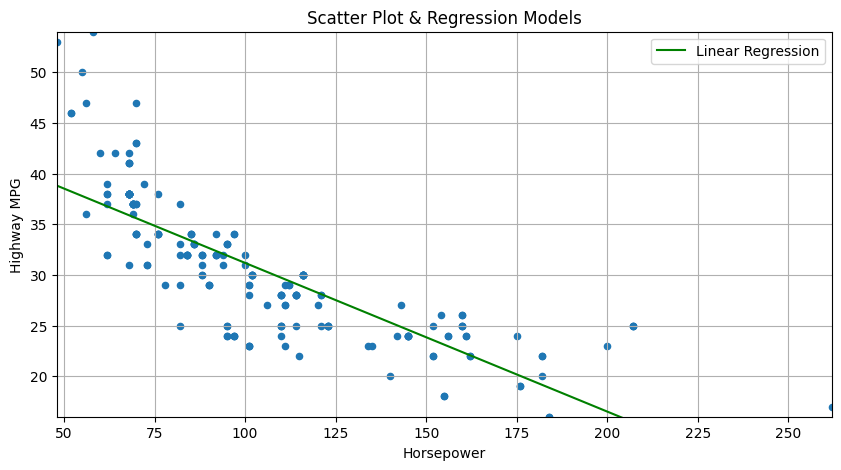

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter Plot
    # Data for Scatter
x = auto['horsepower']
y = auto['highway-mpg']
auto.plot(kind = 'scatter', x = 'horsepower', y = 'highway-mpg', figsize=(10,5))
    # axis
plt.axis([min(x), max(x), min(y), max(y)])
    # linespace
start = np.min(x)
stop = np.max(x)
resolution = 0.1
num = int((stop - start) / resolution)
x = np.linspace(start = start, stop = stop, num = num) 
x_plot = x.reshape(-1, 1)

# Data for Model
X = auto[['horsepower']].values
y = auto['highway-mpg'].values

# 01 LinearRegression
from sklearn.linear_model import LinearRegression 
# Create & Train
linear = LinearRegression()
linear.fit(X,y)
# Predict
y_pred = linear.predict(x_plot)
plt.plot(x_plot, y_pred, color = 'g', label = 'Linear Regression')

# Plotting
plt.xlabel('Horsepower')
plt.ylabel('Highway MPG')
plt.legend()
plt.grid()
plt.title('Scatter Plot & Regression Models')
plt.show()

## 1.2 Multiple Regression
$
y = b0 + b1(x1) + b2(x2) + … + bn(xn)
$

In [3]:
auto.head()

,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,111,5000,21,27,13495
1,111,5000,21,27,16500
2,154,5000,19,26,16500
3,102,5500,24,30,13950
4,115,5500,18,22,17450


### Plotting

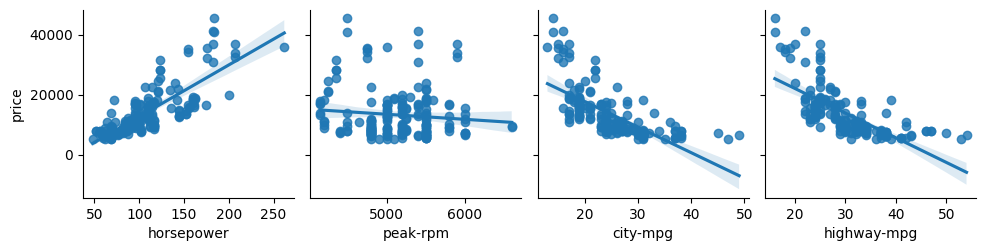

In [4]:
# Data
feature = ['horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']
y2 = ['price']

# Plotting

import seaborn as sns
sns.pairplot(auto, x_vars = feature, y_vars = y2, kind = 'reg')

# 2. Model Evalution
หากยังไม่เข้าใจก็ไม่เป็นไรให้ดูคร่าวๆ ไปก่อน เนื้อหาจะอยู่ที่หัวข้อ 04-3

## 2.1 Evalution Linear Regression

In [5]:
# Create & Train
from sklearn.linear_model import LinearRegression 
# Create & Train
linear = LinearRegression()
linear.fit(X,y)

# R2 has 2 solution
print("R2 Evaluation by Score & R2_score()")
    # .score Evaluation
        # parameter is x and y (actual data)
score = linear.score(X,y)
    # r2_score Evaluation
        # parameter is y (actual data) and y_prediction
         # Create & Train
from sklearn.metrics import r2_score
        # Make predictions 
y_pred = linear.predict(X)
R2_score = r2_score(y, y_pred)
    # print
print("Score =", score,"|", "R2 score =", R2_score)
if score and R2_score <= 0.6 :
    print("(Bad Score, the score should nearly 1(100%) as possible)")
else:
    print("(Not bad Score, the score should nearly 1(100%) as possible)")
    
print()

# MSE & MAE Evaluation
print("MSE & MAE Evaluation")
    # Make predictions 
y_pred = linear.predict(X)
    # Create & Train
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
    # print
print("MSE =",mse,"|","MAE =",mae)
if mse and mae > 0 :
    print("(Bad Score, the score should nearly 0 as possible)")

R2 Evaluation by Score & R2_score()
Score = 0.6473748149600423 | R2 score = 0.6473748149600423
(Not bad Score, the score should nearly 1(100%) as possible)

MSE & MAE Evaluation
MSE = 16.460074551158623 | MAE = 2.9190729146291208
(Bad Score, the score should nearly 0 as possible)


## 2.2 Evalution Linear Regression

In [6]:
X2 = auto[feature]
y2 = auto.price

# Create & Train
from sklearn.linear_model import LinearRegression 
# Create & Train
multi = LinearRegression()
multi.fit(X2,y2)

# R2 has 2 solution
print("R2 Evaluation by Score & R2_score()")
    # .score Evaluation
        # parameter is x and y (actual data)
score2 = multi.score(X2,y2)
    # r2_score Evaluation
        # parameter is y (actual data) and y_prediction
         # Create & Train
from sklearn.metrics import r2_score
        # Make predictions 
y_pred2 = multi.predict(X2)
R2_score2 = r2_score(y2, y_pred2)
    # print
print("Score =", score2,"|", "R2 score =", R2_score)
if score and R2_score2 <= 0.6 :
    print("(Bad Score, the score should nearly 1(100%) as possible)")
else:
    print("(Not bad Score, the score should nearly 1(100%) as possible)")
    
print()

# MSE & MAE Evaluation
print("MSE & MAE Evaluation")
    # Make predictions 
y_pred2 = multi.predict(X2)
    # Create & Train
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse2 = mean_squared_error(y2, y_pred2)
mae2 = mean_absolute_error(y2, y_pred2)
    # print
print("MSE =",mse2,"|","MAE =",mae2)
if mse2 and mae2 > 0 :
    print("(Bad Score, the score should nearly 0 as possible)")

R2 Evaluation by Score & R2_score()
Score = 0.7042142438827723 | R2 score = 0.6473748149600423
(Not bad Score, the score should nearly 1(100%) as possible)

MSE & MAE Evaluation
MSE = 18735033.333279967 | MAE = 3208.2618362498374
(Bad Score, the score should nearly 0 as possible)


# 3. Prediction
การทำนายเพื่อดูแนวโน้ม ถ้ามี x_input[ ] จะได้ค่า prediction เท่าไหร่

## 3.1 Precdict LinearRegression

In [7]:
x_input = [[600]]
linear.predict(x_input)

array([-42.19283804])

## 3.2 Predict MultipleLinearRegression

In [8]:
x_input2 = [[600,4000,35,40],
            [300,4000,28,50],
            [500,5000,40,60],
            [450,3000,20,40]]
multi.predict(x_input2)

/Users/kannapat/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([95343.27423797, 39695.99987812, 68763.2621519 , 68294.20330206])

# 4. Polynomial Regression
Linear Regression จะเป็นเส้นตรงเท่านั้น แต่ความสัมพันธ์ของแต่ละตัวแปรไม่ได้เป็นเส้นตรงเสมอไป โดย Polynomial จะเป็นเป็นโค้งเพื่อให้มีความแม่นยำมากขึ้น

$
y = m_1(x) + m_2(x)^2 + ... + m_n(x)^n + b
$

In [9]:
auto.shape

(199, 5)

In [10]:
auto.columns

Index(['horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'], dtype='object')

Text(0, 0.5, 'Price')

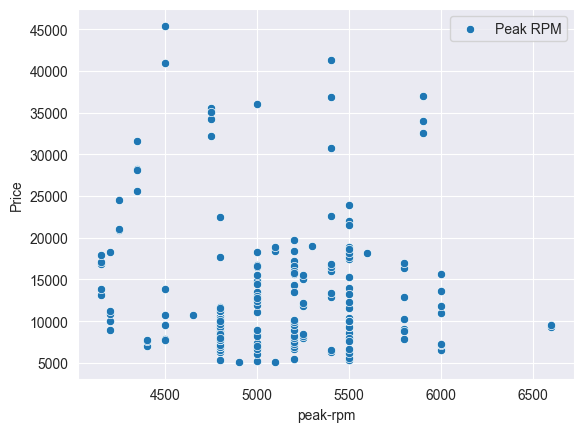

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')

#sns.scatterplot(data = auto, x = 'horsepower', y = 'price', label = 'Horsepower')
sns.scatterplot(data = auto, x = 'peak-rpm', y = 'price', label = 'Peak RPM')
#sns.scatterplot(data = auto, x = 'city-mpg', y = 'price', label = 'City MPG')
#sns.scatterplot(data = auto, x = 'highway-mpg', y = 'price', label = 'Highway MPG')

plt.ylabel('Price')

## 4.1 Plotting

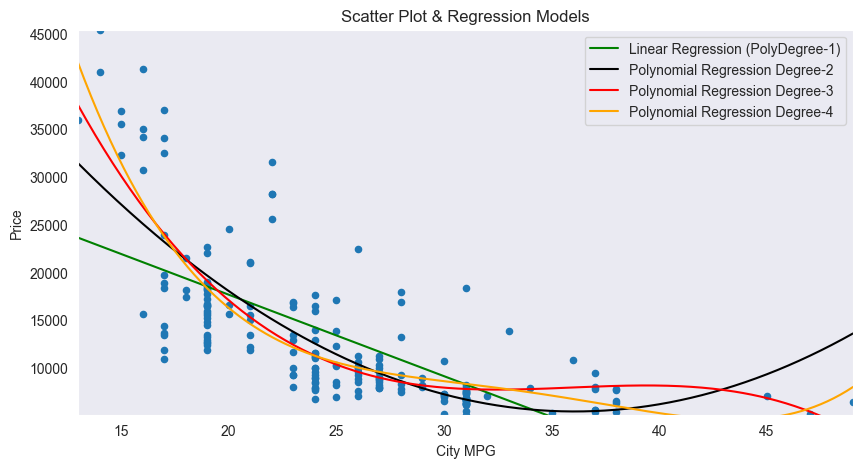

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter Plot
    # Data for Scatter
x = auto['city-mpg']
y = auto['price']
auto.plot(kind = 'scatter', x = 'city-mpg', y = 'price', figsize=(10,5))
    # axis
plt.axis([min(x), max(x), min(y), max(y)])
    # linespace
start = np.min(x)
stop = np.max(x)
resolution = 0.1
num = int((stop - start) / resolution)
x = np.linspace(start = start, stop = stop, num = num) 
x_plot = x.reshape(-1, 1)

# Regression Line
    # Data for Model
X = auto[['city-mpg']].values
y = auto['price'].values

# LinearRegression
    # Create & Train
from sklearn.linear_model import LinearRegression 
linear = LinearRegression()
linear.fit(X,y)
    # Predict & Plot
y_pred = linear.predict(x_plot)
plt.plot(x_plot, y_pred, color = 'g', label = 'Linear Regression (PolyDegree-1)')

# Polynomial Regression
    # degree = 2
        # Create
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree = 2)
        # Transform
x_poly = poly_feature.fit_transform(X)
        # Train
poly = LinearRegression()
poly.fit(x_poly, y)
        # Predict & Plot
x_plot_poly = poly_feature.transform(x_plot)
y_poly = poly.predict(x_plot_poly)
plt.plot(x_plot, y_poly, color = 'black', label = 'Polynomial Regression Degree-2')
    # degree = 3
        # Create
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree = 3)
        # Transform
x_poly = poly_feature.fit_transform(X)
        # Train
poly = LinearRegression()
poly.fit(x_poly, y)
        # Predict & Plot
x_plot_poly = poly_feature.transform(x_plot)
y_poly = poly.predict(x_plot_poly)
plt.plot(x_plot, y_poly, color = 'r', label = 'Polynomial Regression Degree-3')
    # degree = 4
        # Create
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures
poly_feature = PolynomialFeatures(degree = 4)
        # Transform
x_poly = poly_feature.fit_transform(X)
        # Train
poly = LinearRegression()
poly.fit(x_poly, y)
        # Predict & Plot
x_plot_poly = poly_feature.transform(x_plot)
y_poly = poly.predict(x_plot_poly)
plt.plot(x_plot, y_poly, color = 'orange', label = 'Polynomial Regression Degree-4')

# Plotting
plt.xlabel('City MPG')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.title('Scatter Plot & Regression Models')
plt.show()

## 4.2 Evaluation Polynomial Regression Model

In [13]:
# Linear Regression Evaluation
print('1. LinearRegression Evaluation')
    # Create & Train
from sklearn.linear_model import LinearRegression   
linear = LinearRegression()
linear.fit(X,y)

    # R2 has 2 solution
print(" R2 Evaluation by Score & R2_score()")
        # .score Evaluation
            # parameter is x and y (actual data)
score = linear.score(X,y)
        # r2_score Evaluation
            # parameter is y (actual data) and y_prediction
            # Create & Train
from sklearn.metrics import r2_score
            # Make predictions 
y_pred = linear.predict(X)
R2_score = r2_score(y, y_pred)
    # print
print("  Score =", score,"|", "R2 score =", R2_score)
if score and R2_score <= 0.6 :
    print("  (Bad Score, the score should nearly 1(100%) as possible)")
else:
    print(" (Not bad Score, the score should nearly 1(100%) as possible)")
    
print()

    # MSE & MAE Evaluation
print(" MSE & MAE Evaluation")
        # Make predictions 
y_pred = linear.predict(X)
        # Create & Train
from sklearn.metrics import mean_squared_error, mean_absolute_error
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
    # print
print("  MSE =",mse,"|","MAE =",mae)
if mse and mae > 0 :
    print("  (Bad Score, the score should nearly 0 as possible)")

1. LinearRegression Evaluation
 R2 Evaluation by Score & R2_score()
  Score = 0.4750700234854085 | R2 score = 0.4750700234854085
  (Bad Score, the score should nearly 1(100%) as possible)

 MSE & MAE Evaluation
  MSE = 33249000.008442048 | MAE = 4227.496236362741
  (Bad Score, the score should nearly 0 as possible)


In [14]:

print('2. PolynomialRegression Evaluation')
degree = [2,3,4]
for i in degree:
    print('Degree =',i)
        # Create & Train
    from sklearn.linear_model import LinearRegression   
    from sklearn.preprocessing import PolynomialFeatures
    poly_feature = PolynomialFeatures(degree = i)
        # Transform
    x_poly = poly_feature.fit_transform(X)
        # Train
    poly = LinearRegression()
    poly.fit(x_poly, y)
        # Make predictions 
    y_poly = poly.predict(x_poly)

# R2 has 2 solution
    print(" 1. R2 Evaluation by Score & R2_score()")
        # .score Evaluation
            # parameter is x and y (actual data)
    score = poly.score(x_poly,y)
        # r2_score Evaluation
            # parameter is y (actual data) and y_prediction
            # Create & Train
    from sklearn.metrics import r2_score
    R2_score = r2_score(y, y_poly)
    # print
    print("  Score =", score,"|", "R2 score =", R2_score)
    if score and R2_score <= 0.6 :
        print("  (Bad Score, the score should nearly 1(100%) as possible)")
    else:
        print("  (Not bad Score, the score should nearly 1(100%) as possible)")

    # MSE & MAE Evaluation
    print(" 2. MSE & MAE Evaluation")
        # Make predictions 
    y_pred = linear.predict(X)
        # Create & Train
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    # print
    print("  MSE =",mse,"|","MAE =",mae)
    if mse and mae > 0 :
        print("  (Bad Score, the score should nearly 0 as possible)")
    
    print()

2. PolynomialRegression Evaluation
Degree = 2
 1. R2 Evaluation by Score & R2_score()
  Score = 0.6188293651381522 | R2 score = 0.6188293651381522
  (Not bad Score, the score should nearly 1(100%) as possible)
 2. MSE & MAE Evaluation
  MSE = 33249000.008442048 | MAE = 4227.496236362741
  (Bad Score, the score should nearly 0 as possible)

Degree = 3
 1. R2 Evaluation by Score & R2_score()
  Score = 0.6590643841920099 | R2 score = 0.6590643841920099
  (Not bad Score, the score should nearly 1(100%) as possible)
 2. MSE & MAE Evaluation
  MSE = 33249000.008442048 | MAE = 4227.496236362741
  (Bad Score, the score should nearly 0 as possible)

Degree = 4
 1. R2 Evaluation by Score & R2_score()
  Score = 0.6716912483190329 | R2 score = 0.6716912483190329
  (Not bad Score, the score should nearly 1(100%) as possible)
 2. MSE & MAE Evaluation
  MSE = 33249000.008442048 | MAE = 4227.496236362741
  (Bad Score, the score should nearly 0 as possible)

